# CS405 Machine Learning Lab 
### #4 Linear Regression

### 1. Introduction
As you have learnt linear regression in the lecture, now it is time to implement the machine learning techniques in practice. In this lab, you will use linear regression to fit a house price model. You will use some real-world data as the test set to evaluate your model. The scikit-learn package for Python provides many modules for easily developing machine learning algorithms.

### 2. Scikit learn package
Implementation of a linear regression by scratch is not difficult, but here we use the scikit-learn package for Python directly. This package contains many classical machine learning algorithms and is easy to use.

**Datasets: ** scikit-learn provides a number of datasets which can be directly loaded by using a function. There are some small datasets called *toy datasets* and some large ones with thousands of samples called real world datasets. First we load a toy dataset as an example.

In [3]:
import warnings
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

See [sklearn website](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) for details. To do this you have to import right packages and modules. This is a small dataset containing 506 samples and 13 attributes. We need to use proper visualization methods to have an intuitive understanding. We choose the sixth attribute and draw a scattering plot to see the distribution of samples. We use *matplotlib* for data visualization.

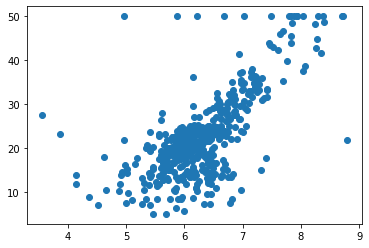

In [8]:
# Use one feature for visualization
x = boston.data[:,5]

# Get the target vector
y = boston.target

# Scattering plot of prive vs. room number
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

It can be seen that the samples have some exceptional distributions at the top of the plot. They may be outliers owing to some practical operation during the data input (e.g., convert any price larger than 50 into 50). However, these data are harmful to the model training, and should be removed.

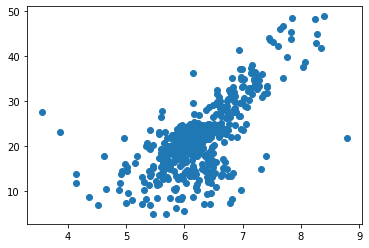

In [9]:
x = x[y<50.0]
y = y[y<50.0]

plt.scatter(x,y)
plt.show()

Now it can be seen that the data is nearly linear, although just in one dimension. Now we use X to denote all attributes

In [10]:
X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]

X.shape

(490, 13)

#### Split data
Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train.shape

(367,)

Usually we also use a validation set. When we use the test set for evaluation, the model will not be changed after the evaluation. However, sometime we want to optimize our model by changing its parameters according to prediction results. The solution is to split a validation set from the training set for adjusting our model. When we believe that the model is good enough, then we evaluate our model on the test set. A more rigorous and costly way is cross validation. With that method, the training set is divided into several pieces in the same size and take every piece as a validation set in turn.

#### Linear Regression
Now we try to implement a simple linear regression model because the dataset seems linear.

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The model has been trained just by using a few lines of codes. Now let’s make a prediction for testing

In [15]:
# Make a prediction
y_0_hat = lin_reg.predict(X_test[0].reshape(1,-1))
y_0_hat

array([16.87817768])

In [16]:
y_test[0]

14.2

Notice that in scikit-learn, the standard interface for machine learning is
1) instantiate a learner with super parameters or none; 
2) use `fit()` method and feed the learner with training data; 
3) use `predict()` for prediction. 

Moreover, the data preprocessing algorithms also have the same interface, they just use `transform()` instead of `predict()`.

Below are the trained parameters.

In [17]:
lin_reg.coef_

array([-1.00113771e-01,  4.14397689e-02, -3.96796131e-02,  7.45817643e-01,
       -1.07448292e+01,  3.86800673e+00, -2.04245407e-02, -1.23584819e+00,
        2.26117537e-01, -1.26888995e-02, -8.08889948e-01,  9.27712353e-03,
       -3.92885393e-01])

In [18]:
lin_reg.intercept_

29.609525107337788

Use the evaluation method to see if it is a good model. The `score()` method uses R-square.

In [19]:
lin_reg.score(X_test, y_test)

0.6858560287217541

### 3.Polynomial Regression
If you have understood the concept of linear regression, you can easily implement polynomial regression. Just a little bit more you should know:

1) Extend the attributes to polynomial attributes. we can achieve that easily by using scikit-learn. See PolynomialFeatures in module preprocessing.
2) When using polynomial features upon data, the values would be extremely large or small because of the power operation. That will influence the use of gradient descent which runs in background when we call `fit()`. So a normalization or standardization is necessary. See StandardScaler in preprocessing.
3) Pipeline can help us assemble several preprocessing functions and the learning process together. The `poly_reg` learner has the same interface as other learners.

```Python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

``` 


4) Regularization in scikit learn is `RidgeRegression`, which is in `linear_model`. Use it if you need regularization in your model.



### 4. Lab Excercises
Please use the real world dataset, **California housing price**, for model training and evaluate the model’s prediction performance. You can use simple linear regression, polynomial regression or more complicated base functions such as Gaussian function or use regularization methods. Make sure at least **20% data for testing** and choose one evaluation method you think good. **Please do not just train your model and say that is good enough, you need to analyze the bias and variance**. For that end, validation or cross validation is needed. Compare the score in the training set and the validation set. If they are both good enough, then use the model on the test set.

**Your test set can only be used for final evaluation!**

Number of rows before removing extreme values: 20640
Number of rows after removing extreme values: 20541


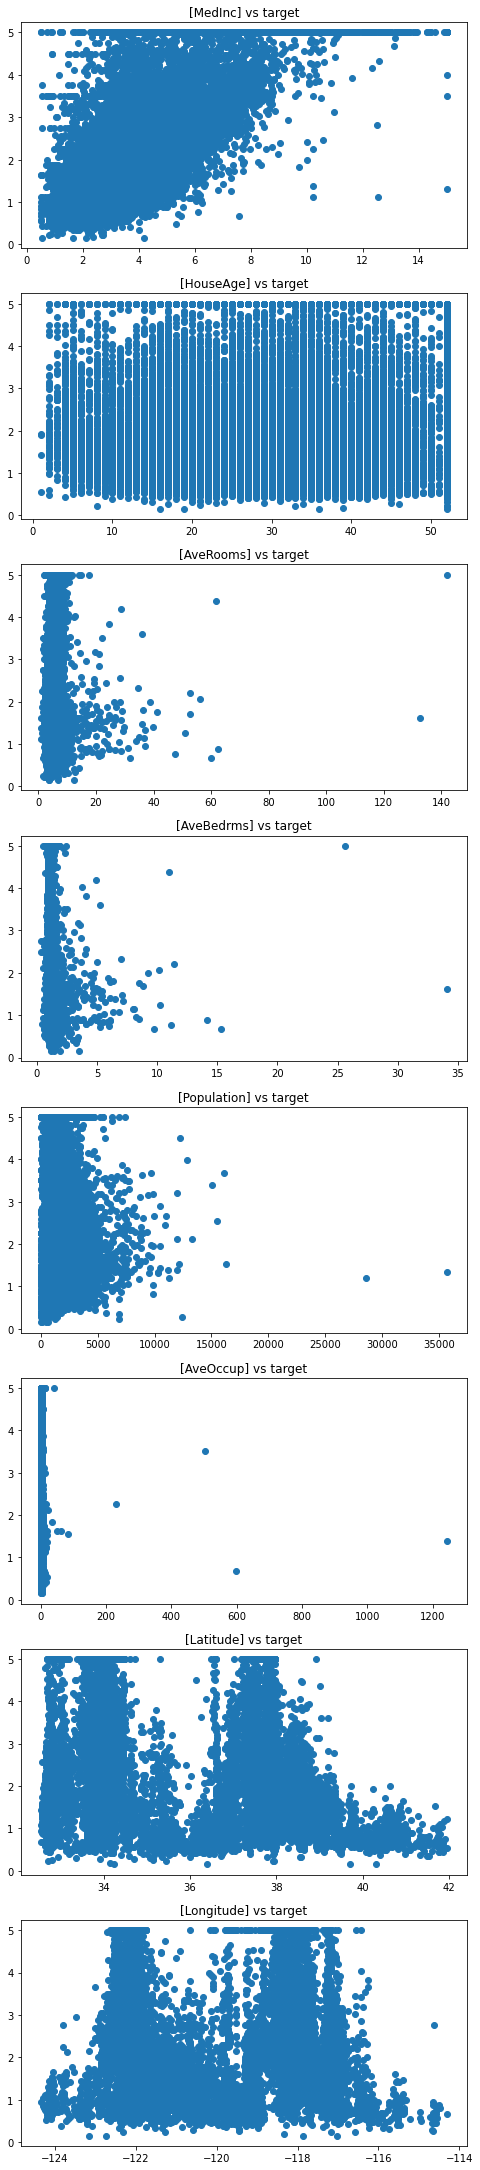

In [20]:
########### Write Your Code Here ###########
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

cal = datasets.fetch_california_housing()
cal_dict = {}
for i in range(len(cal.feature_names)):
    cal_dict[cal.feature_names[i]]=cal.data[:,i]
cal_dict['TARGET']=cal.target
cal_df = pd.DataFrame(cal_dict)

N = len(cal.feature_names)
plt.figure(figsize=(8,N*8))
for i in range(N):
    ax = plt.subplot(13,1,i+1)
    ax.scatter(cal_df.iloc[:,i],cal_df.iloc[:,-1])
    feature = cal['feature_names'][i]
    plt.title(f'[{feature}] vs target')
    
# remove extreme values in the dataset
cal_df1 = cal_df[
    (cal_df['AveRooms']<20)
    & (cal_df['AveBedrms']<5)
    & (cal_df['Population']<10000)
    & (cal_df['AveOccup']<100)
]
print('Number of rows before removing extreme values:',cal_df.shape[0])
print('Number of rows after removing extreme values:',cal_df1.shape[0])
############################################

In [22]:
X = cal_df1.iloc[:,:-1]
y = cal_df1.iloc[:,-1:]

# Data Splitting: 60% for training, 20% for validation and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

# Compare the data before and after removing extreme values, to clarify data after removing extreme values perform better
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def lin_benchmark(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)
    global lin
    lin = LinearRegression()
    lin.fit(X_train,y_train)
    print(lin.score(X_test, y_test))
    
lin_benchmark(cal_df.iloc[:,:-1],cal_df.iloc[:,-1:])

0.5804225860569563


In [23]:
# Polynominal Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

poly_reg_ridge = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scalar',StandardScaler()),
    ('lin_reg',Ridge())
])

poly_reg_lin = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scalar',StandardScaler()),
    ('lin_reg',LinearRegression())
])

poly_reg_ridge.fit(X_train,y_train)
print(poly_reg_ridge.score(X_valid,y_valid))

poly_reg_lin.fit(X_train,y_train)
print(poly_reg_lin.score(X_valid,y_valid))

0.6931167784665665
0.703895040220877


In [24]:
# LinearRgeression Model has High bias and low variance.
# These codes try to compare the bias & variance among LinearRegression, PolynominalRegession and Decision Tree:
from sklearn.tree import DecisionTreeClassifier as DTR
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# benchmark LinReg
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_lin = lin_reg.predict(X_valid)

# benchmark DTR
N=2
y_train_dtr = y_train.TARGET.apply(lambda x: int(round(x,N)*(10**N)))
y_valid_dtr = y_valid.TARGET.apply(lambda x: int(round(x,N)*(10**N)))
dtr = DTR(max_depth=15)
dtr.fit(X_train,y_train_dtr)
y_dtr = dtr.predict(X_valid)

y_train_dtr = y_train_dtr/(10**N)
y_valid_dtr = y_valid_dtr/(10**N)
y_dtr= y_dtr/(10**N)

# benchmark PolyReg, with pretrained model from the block above
y_poly = poly_reg_lin.predict(X_valid)

print('bias of LinReg: ',float(abs(y_lin.mean()-y_valid.mean())))
print('variance of LinReg: ',float(rmse(y_lin,y_valid)))
print('')
print('bias of PolyReg: ',float(abs(y_poly.mean()-y_valid.mean())))
print('variance of PolyReg: ',float(rmse(y_lin,y_valid)))
print('')
print(f'bias of DesTree (with {N} sig. fig.): ',float(abs(y_dtr.mean()-y_valid_dtr.mean())))
print(f'variance of DesTree (with {N} sig. fig.): ',float(rmse(y_dtr,y_valid_dtr)))

bias of LinReg:  0.010967614091649924
variance of LinReg:  0.681644093428322

bias of PolyReg:  0.0018682470576605326
variance of PolyReg:  0.681644093428322

bias of DesTree (with 2 sig. fig.):  0.19190116845180638
variance of DesTree (with 2 sig. fig.):  0.7865636966452468


In [25]:
# final evaluation
print(lin_reg.score(X_test,y_test))
print(poly_reg_lin.score(X_test,y_test))

0.6141521885629824
0.695070820210326


### 5. Questions
1) Describe another real-world application where the regression method can be applied
2) What are the strengths of the linear/polynomial regression methods; when do they perform well?
3) What are the weaknesses of the linear/polynomial regression methods; when do they perform poorly?
4) What makes the linear regression method a good candidate for the regression problem, if you have enough knowledge about the data?